# Project 2 - Classification
## Predict customers likely to respond to a marketing campaign
### This notebook uses the *campaign.xlsx* dataset

## Group E  

## Dataset description

- **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise 
- **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise 
- **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise 
- **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise 
- **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise 
- **Response (target)** - 1 if customer accepted the offer in the last campaign, 0 otherwise 
- **Complain** - 1 if customer complained in the last 2 years
- **DtCustomer** - date of customer’s enrolment with the company
- **Education** - customer’s level of education
- **Marital** - customer’s marital status
- **Kidhome** - number of small children in customer’s household
- **Teenhome** - number of teenagers in customer’s household
- **Income** - customer’s yearly household income
- **MntFishProducts** - amount spent on fish products in the last 2 years
- **MntMeatProducts** - amount spent on meat products in the last 2 years
- **MntFruits** - amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - amount spent on wine products in the last 2 years
- **MntGoldProds** - amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalogue
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through company’s web site
- **NumWebVisitsMonth** - number of visits to company’s web site in the last month
- **Recency** - number of days since the last purchase

## Initializations and data loading

In [1]:
# Installing the necessary packages:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #visualizations


In [2]:
# Modelling packages
import category_encoders as ce
import collections
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
# from yellowbrick.model_selection import RFECV # this one allow to use viz.show() but is slower then the sklearn one
from yellowbrick.model_selection import LearningCurve
from sklearn.feature_selection import RFECV

In [3]:
# Formating that will be applied in all of the notebook
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 15
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 12
heatmaps_text_fontSize = 12

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

# increase the number of columns to display
pd.set_option('display.max_columns', 500)

In [4]:
# Loading the dataset: 
ds = pd.read_parquet('LR-SVM-dataset.parquet.snappy')
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,1967.0,52109.792069,21157.456610,2447.0,35661.500000,51766.000000,68557.000000,160803.000000
Recency,1967.0,48.945602,28.957973,0.0,24.000000,49.000000,74.000000,99.000000
NumDealsPurchases,1967.0,2.324860,1.880377,0.0,1.000000,2.000000,3.000000,15.000000
NumWebVisitsMonth,1967.0,5.299441,2.359008,0.0,3.000000,6.000000,7.000000,20.000000
AcceptedCmp3,1967.0,0.076258,0.265478,0.0,0.000000,0.000000,0.000000,1.000000
AcceptedCmp4,1967.0,0.077275,0.267095,0.0,0.000000,0.000000,0.000000,1.000000
AcceptedCmp5,1967.0,0.071683,0.258028,0.0,0.000000,0.000000,0.000000,1.000000
AcceptedCmp1,1967.0,0.066599,0.249389,0.0,0.000000,0.000000,0.000000,1.000000
AcceptedCmp2,1967.0,0.013218,0.114237,0.0,0.000000,0.000000,0.000000,1.000000
Complain,1967.0,0.009659,0.097831,0.0,0.000000,0.000000,0.000000,1.000000


## LR classification

#### Data preparation

In [5]:
# Create a modeling dataset from the original dataset
X = ds.copy(deep=True)

In [6]:
X.head()

,Income,Recency,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Lifetime,TotalMnt,PercentMntWines,PercentMntFruits,PercentMntMeatProducts,PercentMntFishProducts,PercentMntSweetProducts,PercentMntGoldProds,Frequency,PercentageWebPurchases,PercentageStorePurchases,PercentageCatalogPurchases,PercentageDealsPurchases,AvgTimeBetweenTransaction,AvgWebPurchases,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Kidhome_0,Kidhome_1,Teenhome_0,Teenhome_1
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,58138,58,3,7,0,0,0,0,0,0,1,57,663.0,1617,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,22,0.363636,0.181818,0.454545,0.136364,30.136364,1.142857,0,0,1,0,0,0,0,1,0,0,1,0,1,0
1,46344,38,2,5,0,0,0,0,0,0,0,60,113.0,27,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,4,0.250000,0.500000,0.250000,0.500000,28.250000,0.200000,0,0,1,0,0,0,0,1,0,0,0,1,0,1
2,71613,26,1,4,0,0,0,0,0,0,0,49,312.0,776,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,20,0.400000,0.500000,0.100000,0.050000,15.600000,2.000000,0,0,1,0,0,0,0,0,1,0,1,0,1,0
3,26646,26,2,6,0,0,0,0,0,0,0,30,139.0,53,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,6,0.333333,0.666667,0.000000,0.333333,23.166667,0.333333,0,0,1,0,0,0,0,0,1,0,0,1,1,0
4,58293,94,5,5,0,0,0,0,0,0,0,33,161.0,422,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,14,0.357143,0.428571,0.214286,0.357143,11.500000,1.000000,0,0,0,0,1,0,1,0,0,0,0,1,1,0


In [7]:
# Create the Target
y = X['Response']

In [8]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=123)

In [9]:
toDrop = ['Response', 'AvgWebPurchases','PercentageDealsPurchases']

We have an issue with AvgWebPurchases, even if it doesn't contain infinite because we removed on the eda notebook it doesn't work with the sklearn algorithm. So we need to drop this feature.  
We are also removing PercentageDealsPurchases because this feature improves the result on the SVM but here is doing the opposite.

In [10]:
# Remove the Target from the training
X_train = X_train.drop(toDrop,axis=1)
X_test = X_test.drop(toDrop,axis=1)

In [11]:
# Dataframe for scaling
tempDF = X.copy(deep=True)
tempDF.drop(columns=toDrop, inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic regression

In [12]:
# Create object and train the model
classModel = LogisticRegression(random_state=123, max_iter=200)
classModel.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=123)

In [13]:
# Apply RFECV (Recursive Feature Elimination) to select features
# see https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html
vis = RFECV(classModel, cv=5, scoring='roc_auc', n_jobs=-1)
vis.fit(X_train_scaled, y_train)

RFECV(cv=5, estimator=LogisticRegression(max_iter=200, random_state=123),
      n_jobs=-1, scoring='roc_auc')

Here we are removing features using RFECV that try to remove the less relevant feature one by one and see when the AUC in this case start to decrease.

In [14]:
# Features to include (all in this case)
tempDF.columns[vis.support_]

Index(['Recency', 'NumDealsPurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Customer_Lifetime', 'PercentMntWines', 'PercentMntMeatProducts',
       'PercentMntFishProducts', 'PercentMntGoldProds',
       'PercentageWebPurchases', 'PercentageStorePurchases',
       'PercentageCatalogPurchases', 'Education_Basic', 'Education_PhD',
       'Marital_Status_Married', 'Marital_Status_Together', 'Teenhome_1'],
      dtype='object')

In [15]:
toDrop = tempDF.columns.to_list()

for i in tempDF.columns[vis.support_].to_list():
    toDrop.remove(i)

In [16]:
# Remove the Target from the training
X_train = X_train.drop(toDrop,axis=1)
X_test = X_test.drop(toDrop,axis=1)

In [17]:
toDrop.append('Response')
toDrop.append('AvgWebPurchases')
toDrop.append('PercentageDealsPurchases')

# Dataframe for scaling
tempDF = X.copy(deep=True)
tempDF.drop(columns=toDrop, inplace=True)

# Normalize training/test data
scaler = MinMaxScaler(feature_range=(0, 1))
tempDF_scaled = scaler.fit_transform(tempDF)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Create object and train the model
classModel = LogisticRegression(random_state=123, max_iter=200)
classModel.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=123)

In [19]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['ACCURACY','PRECISION', 'RECALL','F1 SCORE','AUC']
  train_results = [metricsObj.accuracy_score(yTrain, yPredTrain),
                metricsObj.precision_score(yTrain, yPredTrain),
                metricsObj.recall_score(yTrain, yPredTrain),
                metricsObj.f1_score(yTrain, yPredTrain),
                metricsObj.roc_auc_score(yTrain, yPredTrain)
                ]
  test_results = [metricsObj.accuracy_score(yTest, yPredTest),
               metricsObj.precision_score(yTest, yPredTest),
               metricsObj.recall_score(yTest, yPredTest),
               metricsObj.f1_score(yTest, yPredTest),
               metricsObj.roc_auc_score(yTest, yPredTest)
               ]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [20]:
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled) 
y_pred_test = classModel.predict(X_test_scaled) 

In [21]:
# Function to plot confusion matrix - Adapted from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    ax = sns.heatmap(cf,annot=box_labels, fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

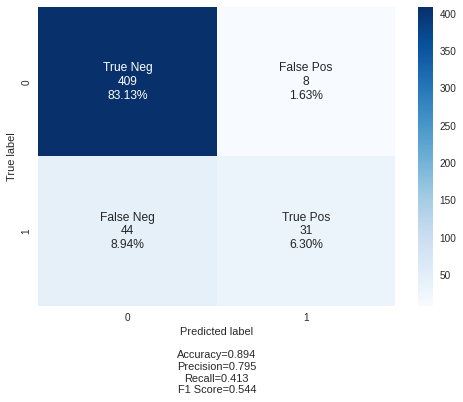

In [22]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [23]:
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.896949,0.894309
1,PRECISION,0.774436,0.794872
2,RECALL,0.457778,0.413333
3,F1 SCORE,0.575419,0.543860
4,AUC,0.716889,0.697074


- As expected, due to imbalanced dataset, we obtain high false negative rate
- F1 score and AUC are acceptable, they can be improved further with class balacing

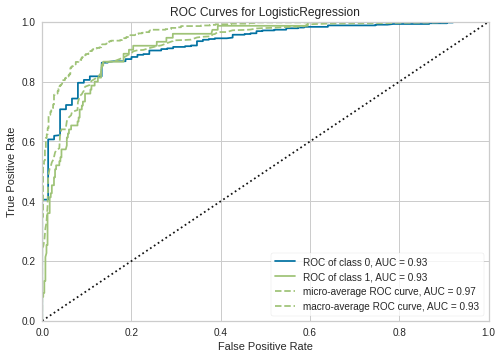

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [24]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

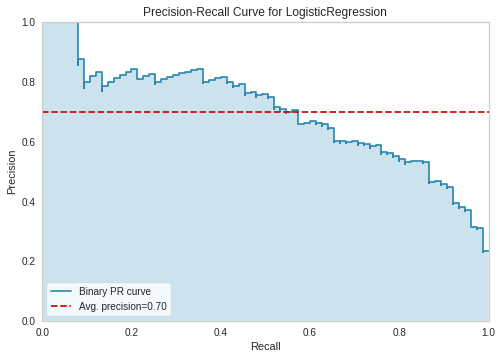

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [25]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

Here the average precision is 70%, we should check later how does it change with more balanced classes.

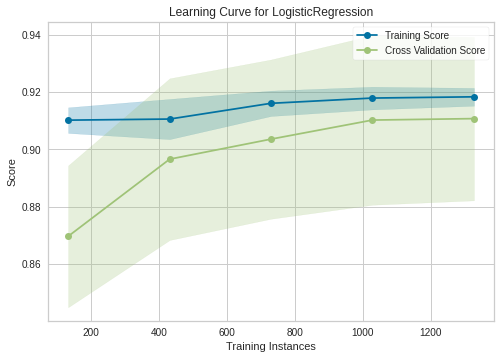

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [26]:
# Plot the learning curve
cv = 10
visualizer = LearningCurve(estimator=classModel, cv=cv, scoring='roc_auc', n_jobs=-1, random_state=123)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()

We will talk about this graph later when we will compare the result with the oversampled and the undersampled one.

### Modeling and evaluating - with oversampling to remove the imbalance

Counter({0: 1250, 1: 225})


<AxesSubplot:xlabel='Response', ylabel='count'>

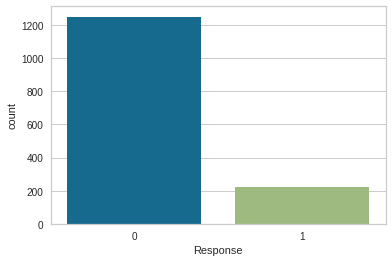

In [27]:
# Display target balance in the training dataset
print(collections.Counter(y_train))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train}), ax=ax)

Counter({1: 1250, 0: 1250})


<AxesSubplot:xlabel='Response', ylabel='count'>

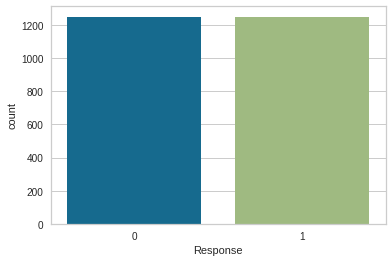

In [28]:
# Import package
from imblearn.over_sampling import SMOTE

# Applyting SMOTE to generare new instances (oversampling)
sm = SMOTE(random_state=123, sampling_strategy=1.0)
X_train_scaled2, y_train2 = sm.fit_resample(X_train_scaled, y_train)

# Display target balance in the training dataset
print(collections.Counter(y_train2))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train2}), ax=ax)

After trying different sampling strategies from 0,5 to 1, we obtain the best results with 1

In [29]:
# Train de model
classModel.fit(X_train_scaled2, y_train2)

# Predict values
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled2) 
y_pred_test = classModel.predict(X_test_scaled) 

# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train2, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.858000,0.833333
1,PRECISION,0.847708,0.474453
2,RECALL,0.872800,0.866667
3,F1 SCORE,0.860071,0.613208
4,AUC,0.858000,0.847002


In this iteration AUC has improved while F1 demonstrates some overfitting. This is related to the drop in precision score: oversampling leads to increase in false positive rate (as initially there were much more negative observations)

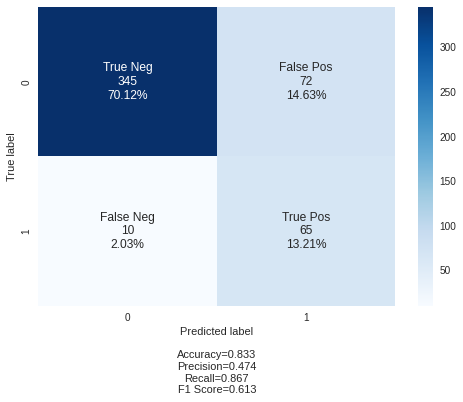

In [30]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- True positive and false positive have increased while false negative has dropped. 
- According to our assumption, the company gets more value in case of maximizing true positives and minimizing false negatives. In this case we reach the goal

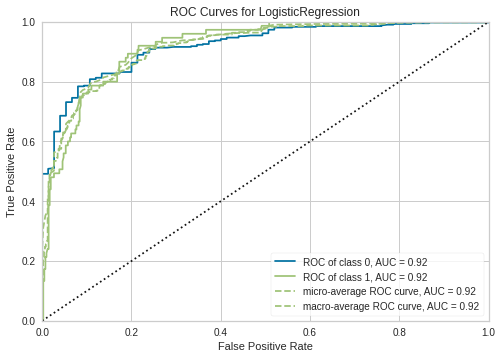

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [31]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

ROC graph shows that the in class 1 true positive rate is increased with the rising of false positive rate, contrary to class 0

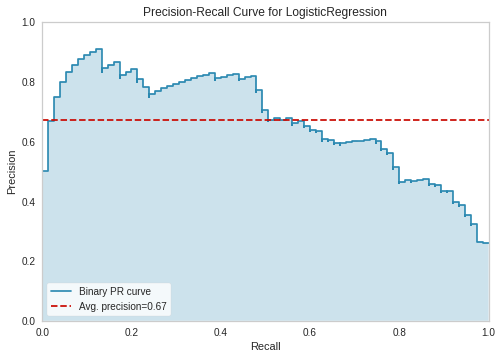

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [32]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled2, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

Now the average precision is lower because we have more false positive, which is normal with oversamplig.

In [33]:
# Show 10 top features coefficients
abs_coef = np.concatenate(np.abs(classModel.coef_))
sorted_index = np.argsort(abs_coef)[::-1] # sort indices
top_10 = sorted_index[:10]
top_10DF = pd.DataFrame(data={'feature': list(X_train.columns[top_10]), 'coef': abs_coef[top_10]})
top_10DF

,feature,coef
0,PercentageStorePurchases,4.255601
1,Recency,3.494877
2,Customer_Lifetime,3.225486
3,PercentageCatalogPurchases,2.612831
4,PercentMntMeatProducts,2.524494
5,NumDealsPurchases,2.446681
6,PercentMntFishProducts,2.405585
7,NumWebVisitsMonth,2.159514
8,AcceptedCmp5,1.941729
9,PercentMntWines,1.885916


Here we see which are the 10 most important feature for this model to undestand if a customer will accept or not the campaign.  
What is important to notice, is that half of these features are features that we engineered.

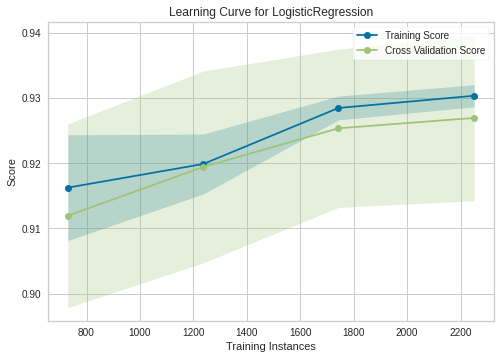

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [34]:
# Plot the learning curve
cv = 10
visualizer = LearningCurve(estimator=classModel, cv=cv, scoring='roc_auc', n_jobs=-1, random_state=123)
visualizer.fit(X_train_scaled2, y_train2)
visualizer.show()

We can notice that comapred the first graph this one show less variance, this was aspected because the variance can be caused by the lack of data.

### Modeling and evaluating - with undersampling to remove the imbalance

Counter({0: 225, 1: 225})


<AxesSubplot:xlabel='Response', ylabel='count'>

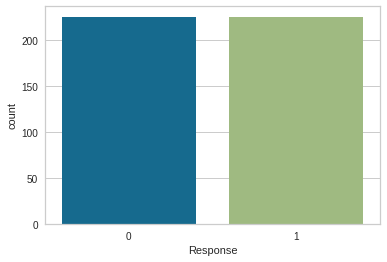

In [35]:
# Subset by class
ss_class_0 = pd.DataFrame(data=X_train_scaled[y_train == 0], index=X_train[y_train == 0].index)
ss_class_1 = pd.DataFrame(data=X_train_scaled[y_train == 1], index=X_train[y_train == 1].index)

# Do random under-sampling (the same 0's as the existing 1's)
count_class_0, count_class_1 = y_train.value_counts()
ss_class_0_under = ss_class_0.sample(count_class_1, replace=False)
X_train_scaled3 = pd.concat([ss_class_0_under, ss_class_1], axis=0)
y_train3 = y_train[X_train_scaled3.index]

# Present results
print(collections.Counter(y_train3))
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(x="Response", data=pd.DataFrame(data={'Response':y_train3}), ax=ax)


In [36]:
# Train de model
classModel.fit(X_train_scaled3, y_train3)

# Predict values
# predict y for X_train and X_test
y_pred_train = classModel.predict(X_train_scaled3) 
y_pred_test = classModel.predict(X_test_scaled) 

# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train3, y_pred_train, y_test, y_pred_test)
resultsDF

,Measure,Train,Test
0,ACCURACY,0.813333,0.823171
1,PRECISION,0.813333,0.455224
2,RECALL,0.813333,0.813333
3,F1 SCORE,0.813333,0.583732
4,AUC,0.813333,0.819137


This results are pretty similar to the one of the oversampled dataset, but has we will see later they are not good as the other dataset.

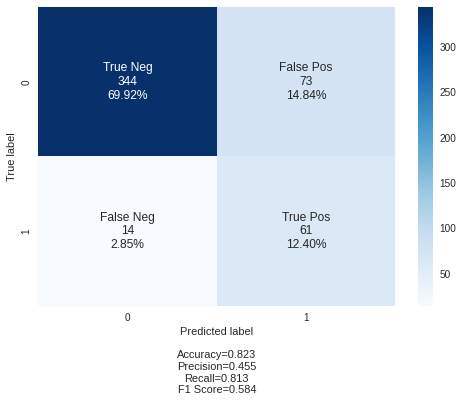

In [37]:
# Show the confusion matrix
cf = metrics.confusion_matrix(y_test,y_pred_test)
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['0', '1']
make_confusion_matrix(cf, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Also here we obtained a similar result of the oversampled dataset for the same reason.

In [38]:
# Check AUC
FP,TP,thresholds = metrics.roc_curve(y_test,classModel.decision_function(X_test_scaled))
print("AUC:{}".format(metrics.auc(FP, TP))) # AUC of ROC

AUC:0.9196482813749001


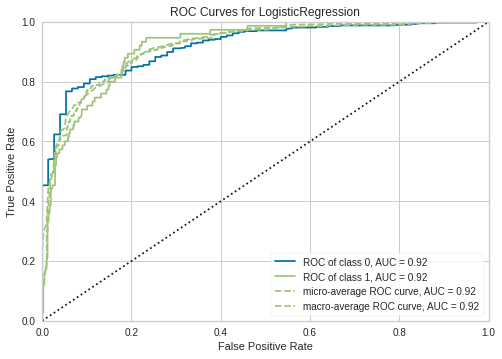

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [39]:
# ROC curve
visualizer = ROCAUC(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

This is the same result that we have on the oversampled one.

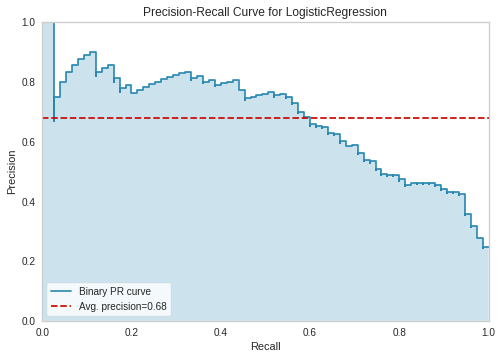

<AxesSubplot:title={'center':'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [40]:
# Precison-Recall curve
visualizer = PrecisionRecallCurve(classModel, classes=['0','1'])
visualizer.fit(X_train_scaled3, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show()

This is the same average precision of the oversampled dataset for the same reason.

In [41]:
# Show 10 top features coefficients
abs_coef = np.concatenate(np.abs(classModel.coef_))
sorted_index = np.argsort(abs_coef)[::-1] # sort indices
top_10 = sorted_index[:10]
top_10DF = pd.DataFrame(data={'feature': list(X_train.columns[top_10]), 'coef': abs_coef[top_10]})
top_10DF

,feature,coef
0,PercentageStorePurchases,2.776050
1,Recency,2.477725
2,Customer_Lifetime,2.223402
3,PercentageCatalogPurchases,1.691693
4,NumDealsPurchases,1.316944
5,AcceptedCmp4,1.313086
6,AcceptedCmp3,1.265295
7,AcceptedCmp5,1.254598
8,PercentMntWines,1.170226
9,PercentMntFishProducts,1.110368


The feature list is changed, but as we will see on the next graph we will not take a look on this list because oversampling is better.

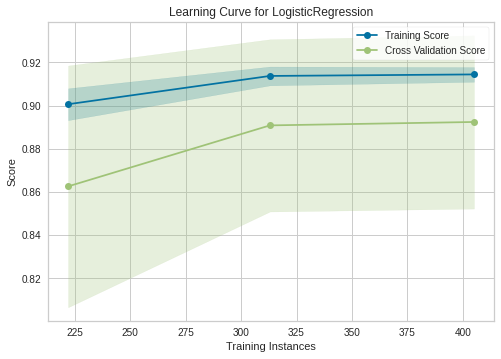

<AxesSubplot:title={'center':'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [42]:
# Plot the learning curve
cv = 10
visualizer = LearningCurve(estimator=classModel, cv=cv, scoring='roc_auc', n_jobs=-1, random_state=123)
visualizer.fit(X_train_scaled3, y_train3)
visualizer.show()

This graph show more variance than the oversampled one, that's why we ended up with choosing oversampling. That was expected because the original dataset is not a big one, so in this case oversamplig is a better choice for all the models. We runned the same graph on each of them an the conclusion was the same for all of them.